In [13]:
from pathlib import Path
import pandas as pd
import numpy as np
from piu.definitions import *

In [14]:
HERE = Path.cwd().parent.parent
DATASET_PATH = HERE / 'dataset'

In [15]:
import sys
import os
import json
sys.path.append(str(HERE))

In [16]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import pandas as pd
from piu.data.data_preprocessor import DataPreprocessor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [17]:

# 🔥 Charger les données
train_df = pd.read_csv(f'{DATASET_PATH}/train.csv')
test_df = pd.read_csv(f'{DATASET_PATH}/test.csv')

# ✅ Vérifier les colonnes communes entre train et test
common_columns = list(set(train_df.columns) & set(test_df.columns))
if "sii" in train_df.columns:
    common_columns.append("sii")  # ✅ S'assurer que la colonne cible est présente dans train_df
print(f"✅ Colonnes communes utilisées : {common_columns}")
# 🔥 Garde uniquement les colonnes communes + la cible
train_df = train_df[common_columns].drop(columns=['id'], errors='ignore')
# ✅ Initialisation du préprocesseur
preprocessor = DataPreprocessor(
    target_column="sii",
    fts="pca",
    k_best=20,
    imp="mean",
    imb="class_weight",
    drop_missing_target=True
)

X, y, class_weights = preprocessor.fit_transform(train_df)
# 🔥 Vérification du nombre de features après transformation
print(f"✅ Nombre de features après transformation : {X.shape[1]}")
# ✅ Stratified Split pour conserver la répartition des classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=(1 - 0.8), stratify=y, random_state=42
)
print(f"✅ Répartition des classes dans train : {np.bincount(y_train.numpy())}")
print(f"✅ Répartition des classes dans test : {np.bincount(y_test.numpy())}")
print(f"✅ Taille du train set: {len(y_train)}, Taille du test set: {len(y_test)}")

X_train = X_train.numpy()
X_test = X_test.numpy()
y_train = y_train.numpy()
y_test = y_test.numpy()

✅ Colonnes communes utilisées : ['BIA-BIA_LDM', 'Physical-HeartRate', 'BIA-BIA_BMC', 'FGC-FGC_SRL', 'CGAS-Season', 'Physical-Systolic_BP', 'Basic_Demos-Enroll_Season', 'SDS-Season', 'SDS-SDS_Total_T', 'Fitness_Endurance-Max_Stage', 'BIA-BIA_FFMI', 'BIA-BIA_ICW', 'FGC-FGC_PU', 'BIA-BIA_ECW', 'SDS-SDS_Total_Raw', 'PAQ_A-Season', 'CGAS-CGAS_Score', 'FGC-FGC_CU', 'PAQ_C-Season', 'Fitness_Endurance-Season', 'FGC-FGC_SRR', 'id', 'BIA-BIA_SMM', 'BIA-BIA_Fat', 'PAQ_A-PAQ_A_Total', 'Fitness_Endurance-Time_Sec', 'BIA-Season', 'Physical-Weight', 'FGC-Season', 'FGC-FGC_GSD_Zone', 'BIA-BIA_FFM', 'Physical-BMI', 'BIA-BIA_LST', 'PreInt_EduHx-computerinternet_hoursday', 'Physical-Height', 'Physical-Diastolic_BP', 'PAQ_C-PAQ_C_Total', 'Basic_Demos-Sex', 'FGC-FGC_CU_Zone', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'PreInt_EduHx-Season', 'FGC-FGC_TL', 'Physical-Waist_Circumference', 'Physical-Season', 'FGC-FGC_SRL_Zone', 'Fitness_Endurance-Time_Mins', 'FGC-FGC_TL_Zone', 'FGC-FGC_GSND_Zone', 'BIA-BIA_A

In [ ]:
target_column="sii"
# ['k_best', 'pca', 'f_classif', 'chi2', 'logistic_regression', 
#'lasso', 'variance_threshold', 'correlation_threshold', None]
feature_selection_method="correlation_threshold" 
k_best=20
# ['median', 'mean', 'knn']
imputation_method="mean"
train_split=0.8
batch_size=8 # 8
hidden_size=32
num_epochs=300
learning_rate=0.0001
wandb_entity="goamegah"
patience=15
model_name="tbn"
# ['class_weight', 'smote', 'random_over', 'random_under', None]
balance_strategy="class_weight"
correlation_threshold=0.9

In [ ]:
clf = TabNetClassifier()  #TabNetRegressor()
clf.fit(
  X_train, 
  y_train,
  eval_set=[(X_test, y_test)],
  weights=1
)
# create folder to save model based on the experiment
CHECKPOINT_DIR = f"{CHECKPOINT_PATH}/mod={model_name}-lr={args.lr}-fts={args.fts}-k={args.k_best}-imb={args.imb}"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)


# ✅ Sauvegarde du préprocesseur
joblib.dump(preprocessor, f"{CHECKPOINT_DIR}/preprocessor.pkl")

# ✅ Sauvegarde des arguments d'entraînement pour la reproductibilité
config_path = f"{CHECKPOINT_DIR}/config.json"
with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

print(f"✅ Config sauvegardée : {config_path}")
print(f"\n✅ Modèle et préprocesseur sauvegardés dans `{CHECKPOINT_DIR}`")

/home/goamegah/Documents/workspace/venv/deepl-piu/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.70115 | val_0_accuracy: 0.26095 |  0:00:00s
epoch 1  | loss: 1.49816 | val_0_accuracy: 0.19343 |  0:00:00s
epoch 2  | loss: 1.41597 | val_0_accuracy: 0.14234 |  0:00:00s
epoch 3  | loss: 1.34536 | val_0_accuracy: 0.17701 |  0:00:00s
epoch 4  | loss: 1.28973 | val_0_accuracy: 0.19526 |  0:00:00s
epoch 5  | loss: 1.26475 | val_0_accuracy: 0.18613 |  0:00:00s
epoch 6  | loss: 1.23497 | val_0_accuracy: 0.21898 |  0:00:00s
epoch 7  | loss: 1.19537 | val_0_accuracy: 0.24453 |  0:00:00s
epoch 8  | loss: 1.1595  | val_0_accuracy: 0.23905 |  0:00:01s
epoch 9  | loss: 1.1342  | val_0_accuracy: 0.25    |  0:00:01s
epoch 10 | loss: 1.13783 | val_0_accuracy: 0.27555 |  0:00:01s
epoch 11 | loss: 1.12437 | val_0_accuracy: 0.30292 |  0:00:01s
epoch 12 | loss: 1.14645 | val_0_accuracy: 0.28467 |  0:00:01s
epoch 13 | loss: 1.10404 | val_0_accuracy: 0.2719  |  0:00:01s
epoch 14 | loss: 1.08803 | val_0_accuracy: 0.23905 |  0:00:01s
epoch 15 | loss: 1.11827 | val_0_accuracy: 0.23723 |  0

/home/goamegah/Documents/workspace/venv/deepl-piu/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


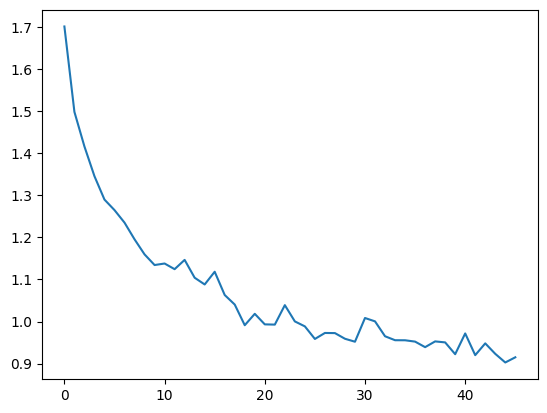

In [7]:
# plot losses
plt.plot(clf.history['loss'])

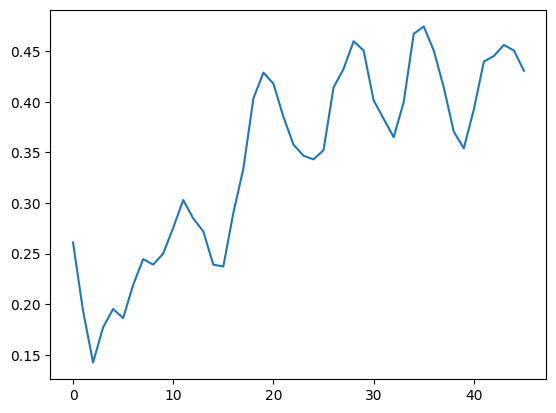

In [8]:
# plot accuracy
plt.plot(clf.history['val_0_accuracy'])


In [9]:
preds = clf.predict(X_test)
print(preds)

[0 3 2 2 0 0 2 0 3 1 2 0 0 0 0 0 2 2 0 2 2 0 0 2 2 0 1 3 1 0 2 0 1 2 3 0 2
 2 1 0 2 3 0 2 3 0 0 0 2 0 3 2 0 2 2 0 2 0 2 1 2 0 0 2 0 2 0 2 0 2 2 2 0 0
 0 2 0 0 2 2 3 2 3 1 2 0 0 0 1 2 2 2 2 0 2 0 2 2 0 1 2 0 0 3 1 2 0 2 0 3 1
 1 2 1 2 2 0 1 0 1 0 3 0 0 0 3 0 0 2 0 1 0 1 1 1 2 1 0 2 0 2 0 3 0 2 0 0 0
 3 2 0 0 0 3 3 0 0 1 0 2 1 0 0 2 1 2 0 0 0 0 0 0 0 2 2 0 2 0 1 0 0 0 2 0 2
 0 2 0 3 2 0 1 0 0 2 0 0 0 1 2 2 0 0 3 1 1 0 2 0 1 0 3 1 0 0 0 0 0 3 0 3 0
 1 0 0 0 1 3 0 0 2 0 2 2 1 0 0 2 2 0 0 0 0 0 0 0 2 1 0 1 0 1 2 1 0 2 0 2 0
 0 0 3 0 1 3 2 2 0 0 2 0 0 0 2 1 3 0 0 0 0 3 0 0 0 0 3 3 2 0 2 0 2 1 0 3 0
 0 2 0 0 1 0 1 0 2 2 0 2 2 3 0 2 0 3 2 0 0 2 0 1 2 0 0 0 2 2 0 0 0 0 0 1 0
 0 2 1 2 0 2 0 0 0 0 1 0 0 1 0 2 2 3 2 2 0 0 1 2 1 1 2 0 2 2 2 3 0 2 3 2 0
 0 1 0 3 0 0 0 0 0 0 0 0 0 2 0 2 1 0 1 0 0 0 2 0 2 1 0 2 2 0 1 0 0 2 1 2 1
 1 1 2 0 1 0 0 0 2 0 0 1 0 0 0 0 0 2 1 0 2 2 3 0 0 2 0 2 3 0 0 0 0 0 0 2 2
 0 3 0 1 0 0 1 1 0 2 1 0 0 1 1 3 1 0 1 0 0 0 2 1 0 0 2 0 0 2 3 2 2 1 0 0 2
 0 2 0 3 0 0 2 0 0 0 0 0 

In [ ]:
saving_path_name = "./tabnet_model_test_1"
# create folder to save model based on the experiment
CHECKPOINT_DIR = f"{CHECKPOINT_PATH}/mod={args.model_type}-lr={args.lr}-fts={args.fts}-k={args.k_best}-imb={args.imb}"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
saved_filepath = clf.save_model(saving_path_name)